In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
import fcalc

## Binarized data

In [2]:
df = pd.read_csv("heart.csv")
df['target'] = [x == 1 for x in df['target']]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,True
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,True
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,True
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,True
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,True


In [3]:
quartiles = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]
vals = []
cols_cat = ['age', 'trestbps','chol', 'thalach', 'oldpeak']


for i in cols_cat:
    qs = []
    for j in quartiles:
        qs.append(df[i].quantile(j))
    vals.append(qs)
    
def quantiles(x, lis):
    for i in lis:
        if x > i:
            return f'>{i}'

In [4]:
df['age'] = df['age'].apply(lambda x: quantiles(x = x, lis = vals[0]))
df['chol'] = df['chol'].apply(lambda x: quantiles(x = x, lis = vals[1]))
df['trestbps'] = df['trestbps'].apply(lambda x: quantiles(x = x, lis = vals[2]))
df['thalach'] = df['thalach'].apply(lambda x: quantiles(x = x, lis = vals[3]))
df['oldpeak'] = df['oldpeak'].apply(lambda x: quantiles(x = x, lis = vals[4]))

In [5]:
X = pd.get_dummies(data=df, prefix=cols_cat).astype(bool)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X.drop(["target"], axis=1), # X
                                                    X["target"], # y
                                                    test_size=0.3, # доля от всех записей
                                                    random_state=1337, # зерно
                                                    stratify=X["target"], # а это что?
                                        )

In [7]:
from sklearn.model_selection import KFold, StratifiedKFold

X_train_matrix = X_train.values

kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

for i in ['standard', 'standard-support', 'ratio-support']:
    score_accuracy = []
    
    for array1, array2 in kfold.split(X_train_matrix, y_train):   
        x_train_cv = X_train_matrix[array1]
        y_train_cv = np.array(y_train)[list(array1)]

        x_test_cv = X_train_matrix[array2]
        y_test_cv = np.array(y_train)[list(array2)]

        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(x_train_cv, y_train_cv, method=i)
        bin_cls.predict(x_test_cv)
        y_pred_cv = bin_cls.predictions

        score_accuracy.append(accuracy_score(y_test_cv, y_pred_cv))
    
    print(f'{i}: mean: {np.array(score_accuracy).mean()}, max: {max(score_accuracy)}, min: {min(score_accuracy)}')
    #print(y_train_cv.mean(), y_test_cv.mean())
    
    
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train_matrix, y_train, method='ratio-support')
bin_cls.predict(X_test.values)
y_pred = bin_cls.predictions

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

accuracy_fcalc = accuracy_score(y_test, y_pred)
f1_fcalc = f1_score(y_test, y_pred)

standard: mean: 0.740531561461794, max: 0.8372093023255814, min: 0.6428571428571429
standard-support: mean: 0.7262458471760798, max: 0.7906976744186046, min: 0.6428571428571429
ratio-support: mean: 0.7452934662236987, max: 0.7674418604651163, min: 0.7209302325581395
0.8131868131868132
0.8131868131868132


## Pattern structures

In [8]:
df = pd.read_csv("heart.csv")
df['target'] = [x == 1 for x in df['target']]
cols_cat = ['age', 'trestbps','chol', 'thalach', 'oldpeak']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,True
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,True
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,True
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,True
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,True


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df.drop(["target"], axis=1), # X
                                                    df["target"], # y
                                                    test_size=0.3, # доля от всех записей
                                                    random_state=1337, # зерно
                                                    stratify=X["target"], # а это что?
                                        )

In [10]:
X_train_matrix = X_train.values

kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

for i in ['standard', 'standard-support', 'ratio-support']:
    score_accuracy = []
    
    for array1, array2 in kfold.split(X_train_matrix, y_train):   
        x_train_cv = X_train_matrix[array1]
        y_train_cv = np.array(y_train)[list(array1)]

        x_test_cv = X_train_matrix[array2]
        y_test_cv = np.array(y_train)[list(array2)]
        
        pat_cls = fcalc.classifier.PatternBinaryClassifier(x_train_cv, y_train_cv)
        pat_cls.predict(x_test_cv)
        
        y_pred_cv = pat_cls.predictions

        score_accuracy.append(accuracy_score(y_test_cv, y_pred_cv))
    
    print(f'{i}: mean: {np.array(score_accuracy).mean()}, max: {max(score_accuracy)}, min: {min(score_accuracy)}')

standard: mean: 0.7919158361018827, max: 0.9069767441860465, min: 0.6904761904761905
standard-support: mean: 0.7919158361018827, max: 0.9069767441860465, min: 0.6904761904761905
ratio-support: mean: 0.7919158361018827, max: 0.9069767441860465, min: 0.6904761904761905


In [11]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train_matrix, y_train)
pat_cls.predict(X_test.values)

y_pred = pat_cls.predictions

y_pred = [np.random.choice([0,1]) if i == -1 else i for i in y_pred]
accuracy_fcalc_stru = accuracy_score(y_test, y_pred)
f1_fcalc_stru = f1_score(y_test, y_pred)


# Другие модели

In [12]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df.drop(["target"], axis=1), # X
                                                    df["target"], # y
                                                    test_size=0.3, # доля от всех записей
                                                    random_state=1337, # зерно
                                                    stratify=X["target"], # а это что?
                                        )

In [14]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2


In [15]:
from sklearn.preprocessing import OrdinalEncoder
from scipy import sparse as sp

def prepare_features_for_logic(data: pd.DataFrame, cat_encoder=None):
    
    cat_columns = cols_cat = ['age', 'trestbps','chol', 'thalach', 'oldpeak']
    real_columns = ["age", 'trestbps', 'chol', 'thalach', 'oldpeak']
    
    # categorical features
    
    if cat_encoder is None:
        oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        oe.fit(data[cat_columns])
    else:
        oe = cat_encoder
    
    X_cat = oe.transform(data[cat_columns])
    mapped_cat_values = oe.categories_
    cat_fnames = cat_columns
    
    # real-valued features
    
    # todo: вообще очень часто есть смысл отбросить из обучающей выборки примеры, 
    #       значения которых редки (например, выпадающие далеко "за три сигмы")
    
    X_real = data[real_columns].values    
    feature_matrix = np.hstack([X_cat, X_real]) # note: `np` for dense Numpy matrices
    
    return feature_matrix, list(cat_fnames) + real_columns, oe, mapped_cat_values

X_train_dense, fnames_dense, encoder, mapped_cat_values = prepare_features_for_logic(X_train)
X_test_dense, _, _, _ = prepare_features_for_logic(X_test, encoder)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Дерево решений
clf = DecisionTreeClassifier(max_depth=4, class_weight="balanced").fit(X_train_dense, y_train)
y_pred = clf.predict(X_test_dense)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

accuracy_tree = accuracy_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)

0.7339449541284404
0.6813186813186813


In [17]:
# Дерево решений 

param_grid = {
    "n_estimators": [10, 50, 100],
    "min_samples_leaf": [1, 2, 3, 5],
    "max_samples": [0.3, None]
}
param_grid

scores = ["f1", "accuracy"]

for score in scores:
    print("# Tuning for %s" % score)
    print()
    # loo = LeaveOneOut()

    clf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=100, class_weight='balanced_subsample'), 
                       param_grid, scoring=score, verbose=1, cv=3)

    clf.fit(X_train_dense, y_train)

    print("Best params on dev set:")
    print(clf.best_params_)
    
    print("Scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
    best_model = clf.best_estimator_
    best_model.fit(X_train_dense, y_train)
    
y_pred = best_model.predict(X_test_dense)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

accuracy_forest = accuracy_score(y_test, y_pred)
f1_forest = f1_score(y_test, y_pred)

# Tuning for f1

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best params on dev set:
{'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
Scores on development set:
0.699 (+/-0.073) for {'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 10}
0.736 (+/-0.070) for {'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 50}
0.755 (+/-0.044) for {'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 100}
0.732 (+/-0.066) for {'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 10}
0.752 (+/-0.086) for {'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 50}
0.758 (+/-0.060) for {'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
0.736 (+/-0.045) for {'max_samples': 0.3, 'min_samples_leaf': 3, 'n_estimators': 10}
0.757 (+/-0.073) for {'max_samples': 0.3, 'min_samples_leaf': 3, 'n_estimators': 50}
0.743 (+/-0.043) for {'max_samples': 0.3, 'min_samples_leaf': 3, 'n_estimators': 100}
0.713 (+/-0.009) for {'max_samples': 0

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import sparse as sp

# Не все классификаторы умеют обращаться с категориальными признаками. 
def prepare_features_for_logreg(data: pd.DataFrame, cat_encoder=None, real_scaler=None):
    cat_columns = cols_cat = ['age', 'trestbps','chol', 'thalach', 'oldpeak']
    real_columns = ["age", 'trestbps', 'chol', 'thalach', 'oldpeak']
    
    # categorical features
    if cat_encoder is None:
        ohe = OneHotEncoder(handle_unknown="ignore")
        ohe.fit(data[cat_columns])
    else:
        ohe = cat_encoder
    X_cat = ohe.transform(data[cat_columns])
    cat_fnames = ohe.get_feature_names_out(cat_columns)
    
    # real-valued features
    if real_scaler is None:
        stsc = StandardScaler()
        stsc.fit(data[real_columns])
    else:
        stsc = real_scaler
    X_real = stsc.transform(data[real_columns])
    feature_matrix = sp.hstack([X_cat, X_real])
    
    return feature_matrix, list(cat_fnames) + real_columns, ohe, stsc

X_train_sparse, fnames_sparse, encoder_sparse, scaler = prepare_features_for_logreg(X_train)
X_test_sparse, _, _, _ = prepare_features_for_logreg(X_test, encoder_sparse, scaler)

X_train_sparse.shape, X_test_sparse.shape

((212, 325), (91, 325))

In [20]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_sparse, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = neigh.predict(X_test_sparse)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

0.74
0.7142857142857143


In [22]:
from sklearn.linear_model import LogisticRegression

clf_linear = LogisticRegression(C=0.99, class_weight="balanced", 
                                solver="saga", penalty="l1")
clf_linear.fit(X_train_sparse, y_train)

y_pred = clf_linear.predict(X_test_sparse)

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

accuracy_log = accuracy_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)

0.7216494845360825
0.7032967032967034


C:\Users\777sa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_dense, y_train)
y_pred = model.predict(X_test_dense)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

accuracy_xgb = accuracy_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

0.6964285714285714
0.6263736263736264


In [24]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
    #verbose=5,
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

accuracy_cat = accuracy_score(y_test, y_pred)
f1_cat = f1_score(y_test, y_pred)

Learning rate set to 0.160145
0:	learn: 0.6478253	test: 0.6489870	best: 0.6489870 (0)	total: 142ms	remaining: 1.27s
1:	learn: 0.6162582	test: 0.6288872	best: 0.6288872 (1)	total: 143ms	remaining: 572ms
2:	learn: 0.5885567	test: 0.6050665	best: 0.6050665 (2)	total: 144ms	remaining: 337ms
3:	learn: 0.5613574	test: 0.5842097	best: 0.5842097 (3)	total: 146ms	remaining: 219ms
4:	learn: 0.5350618	test: 0.5607138	best: 0.5607138 (4)	total: 147ms	remaining: 147ms
5:	learn: 0.5175697	test: 0.5493132	best: 0.5493132 (5)	total: 148ms	remaining: 98.7ms
6:	learn: 0.4974593	test: 0.5324531	best: 0.5324531 (6)	total: 149ms	remaining: 63.7ms
7:	learn: 0.4792543	test: 0.5112358	best: 0.5112358 (7)	total: 150ms	remaining: 37.4ms
8:	learn: 0.4664395	test: 0.5021420	best: 0.5021420 (8)	total: 151ms	remaining: 16.7ms
9:	learn: 0.4552182	test: 0.4880993	best: 0.4880993 (9)	total: 152ms	remaining: 0us

bestTest = 0.4880992708
bestIteration = 9

0.8737864077669903
0.8571428571428571


In [25]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_dense, y_train)
y_pred = model.predict(X_test_dense)

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


accuracy_bay = accuracy_score(y_test, y_pred)
f1_bay = f1_score(y_test, y_pred)

0.7272727272727272
0.7032967032967034


# Итоги

Accuracy
-------------------
XGB: 0.63
Tree: 0.68
Log_Reg: 0.7
NaiveB: 0.7
KNN: 0.71
RandForest: 0.73
Fcalc_Structure: 0.78
Fcalc_Binarized: 0.81
Catboost: 0.86


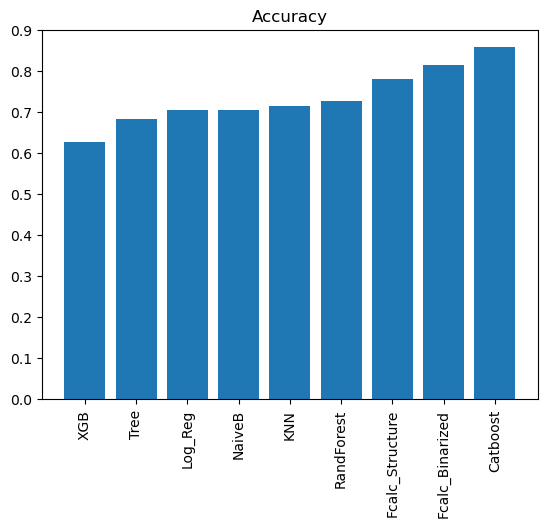

In [26]:
import operator
all_accs = [ accuracy_fcalc
            ,accuracy_fcalc_stru
            ,accuracy_tree
            ,accuracy_forest
            ,accuracy_knn
            ,accuracy_log
            ,accuracy_xgb
            ,accuracy_cat
            ,accuracy_bay]
all_accs_names = [ 
             'Fcalc_Binarized'
            ,'Fcalc_Structure'
            ,'Tree'
            ,'RandForest'
            ,'KNN'
            ,'Log_Reg'
            ,'XGB'
            ,'Catboost'
            ,'NaiveB']

my_dict = dict(zip(all_accs_names, all_accs))
sorted_accs = dict(sorted(my_dict.items(), key=operator.itemgetter(1)))

lists = sorted_accs.items() # sorted by key, return a list of tuples
x, y = zip(*lists)

print('Accuracy\n-------------------')
for i in lists:
    print(i[0],': ', round(i[1],2), sep='')
    
plt.bar(x = x, height=y)
plt.xticks(rotation=90)
plt.title('Accuracy');

F1_Score
-------------------
XGB: 0.7
Log_Reg: 0.72
NaiveB: 0.73
Tree: 0.73
KNN: 0.74
RandForest: 0.76
Fcalc_Structure: 0.8
Fcalc_Binarized: 0.81
Catboost: 0.87


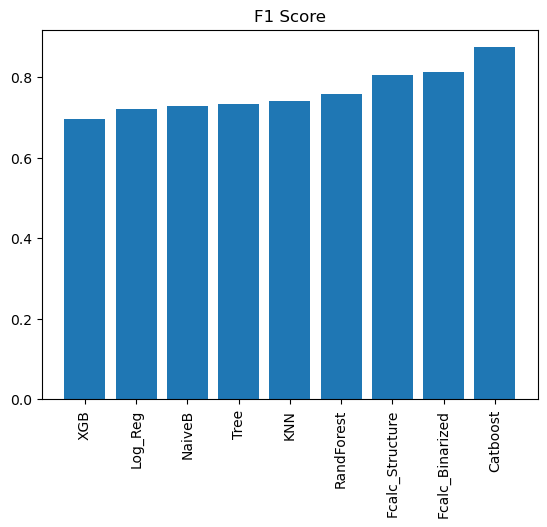

In [27]:
import operator
all_accs = [ f1_fcalc
            ,f1_fcalc_stru
            ,f1_tree
            ,f1_forest
            ,f1_knn
            ,f1_log
            ,f1_xgb
            ,f1_cat
            ,f1_bay]
all_accs_names = [ 
             'Fcalc_Binarized'
            ,'Fcalc_Structure'
            ,'Tree'
            ,'RandForest'
            ,'KNN'
            ,'Log_Reg'
            ,'XGB'
            ,'Catboost'
            ,'NaiveB']

my_dict = dict(zip(all_accs_names, all_accs))
sorted_accs = dict(sorted(my_dict.items(), key=operator.itemgetter(1)))

lists = sorted_accs.items() # sorted by key, return a list of tuples
x, y = zip(*lists)

print('F1_Score\n-------------------')
for i in lists:
    print(i[0],': ', round(i[1],2), sep='')
    
plt.bar(x = x, height=y)
plt.xticks(rotation=90)
plt.title('F1 Score');